### This notebook contains EDA and modeling for the subset of UCI Crime Data containing LEMAS survey response

In [70]:
import pickle
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

In [76]:
import numpy as np

In [71]:
%matplotlib inline

In [2]:
with open('crime_in.pickle', 'rb') as to_read:
    crime_in = pickle.load(to_read)

In [4]:
crime_in.head()

,State,countyCode,communityCode,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,...,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,nonViolPerPop,Inmates,Index,New Index *,Index/ Inmates,Index/Inmates
0,NJ,39,5320,11980,3.10,1.37,91.78,6.50,1.88,12.47,...,NaN,NaN,0.0,NaN,1394.59,307.4,4660.9,1018.9,3.3,3.3
1,PA,45,47616,23123,2.82,0.80,95.57,3.44,0.85,11.01,...,NaN,NaN,0.0,NaN,1955.95,232.6,3271.9,711.2,3.1,3.1
2,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,11.36,...,NaN,NaN,0.0,NaN,6167.51,190.2,6296.4,1098.2,5.8,5.8
3,NY,35,29443,16656,2.40,1.70,97.35,0.50,0.70,12.55,...,NaN,NaN,0.0,NaN,NaN,361.6,5070.6,1376.1,3.8,3.8
4,MN,7,5068,11245,2.76,0.53,89.16,1.17,0.52,24.46,...,NaN,NaN,0.0,NaN,9988.79,99.2,4341.0,757.2,7.6,7.6


In [163]:
crime_police = crime_in[['nonViolPerPop',
                                  
                        'racialMatch', 'pctPolicMinority','pctOfficDrugUnit', 
                        
                        'pctBlack', 'pctAsian', 'pctHisp',
                        
                        'pctWwage', 'pctWdiv', 'pctUnemploy', 'pctOccupManu', 'pctOccupMgmt',
                        
                        'pct2Par','pctAllDivorc', 'pctKidsBornNevrMarr',
                         
                        'pctPoverty', 'medIncome', 'pctPubAsst', 'pctNotHSgrad'
                        
                        ]]

In [164]:
crime_police['log_nonviolent'] = crime_police['nonViolPerPop'].apply(lambda x: np.log(x))

/Users/Chloe/.conda/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
crime_police.head()

,nonViolPerPop,racialMatch,pctPolicMinority,pctOfficDrugUnit,pctBlack,pctAsian,pctHisp,pctWwage,pctWdiv,pctUnemploy,pctOccupManu,pctOccupMgmt,pct2Par,pctAllDivorc,pctKidsBornNevrMarr,pctPoverty,medIncome,pctPubAsst,pctNotHSgrad,log_nonviolent
0,1394.59,NaN,NaN,0.0,1.37,6.50,1.88,89.24,70.20,2.70,5.49,50.73,91.43,4.47,0.36,1.96,75122,1.03,9.90,7.240356
1,1955.95,NaN,NaN,0.0,0.80,3.44,0.85,78.99,64.11,2.43,6.39,37.64,86.91,5.42,0.24,3.98,47917,2.75,13.72,7.578631
2,6167.51,NaN,NaN,0.0,0.74,3.43,2.35,82.00,55.73,4.01,8.79,32.48,78.54,12.55,0.88,4.75,35669,2.94,9.09,8.727050
3,NaN,NaN,NaN,0.0,1.70,0.50,0.70,68.15,38.95,9.86,26.76,22.71,64.02,12.91,3.84,17.23,20580,11.71,33.68,NaN
4,9988.79,NaN,NaN,0.0,0.53,1.17,0.52,69.33,42.82,9.08,10.94,27.80,58.59,9.73,4.70,29.99,17390,11.21,23.06,9.209219


In [166]:
crime_police.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2214
Data columns (total 20 columns):
nonViolPerPop          2118 non-null float64
racialMatch            343 non-null float64
pctPolicMinority       343 non-null float64
pctOfficDrugUnit       2215 non-null float64
pctBlack               2215 non-null float64
pctAsian               2215 non-null float64
pctHisp                2215 non-null float64
pctWwage               2215 non-null float64
pctWdiv                2215 non-null float64
pctUnemploy            2215 non-null float64
pctOccupManu           2215 non-null float64
pctOccupMgmt           2215 non-null float64
pct2Par                2215 non-null float64
pctAllDivorc           2215 non-null float64
pctKidsBornNevrMarr    2215 non-null float64
pctPoverty             2215 non-null float64
medIncome              2215 non-null int64
pctPubAsst             2215 non-null float64
pctNotHSgrad           2215 non-null float64
log_nonviolent         2118 non-null float

In [157]:
crime_police['medIncome'].describe()

count      2215.000000
mean      33984.696163
std       13424.680011
min        8866.000000
25%       23817.000000
50%       31441.000000
75%       41480.500000
max      123625.000000
Name: medIncome, dtype: float64

In [167]:
crime_police = crime_police.dropna().reset_index(drop=True)  #total obs = 323

In [168]:
crime_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 20 columns):
nonViolPerPop          323 non-null float64
racialMatch            323 non-null float64
pctPolicMinority       323 non-null float64
pctOfficDrugUnit       323 non-null float64
pctBlack               323 non-null float64
pctAsian               323 non-null float64
pctHisp                323 non-null float64
pctWwage               323 non-null float64
pctWdiv                323 non-null float64
pctUnemploy            323 non-null float64
pctOccupManu           323 non-null float64
pctOccupMgmt           323 non-null float64
pct2Par                323 non-null float64
pctAllDivorc           323 non-null float64
pctKidsBornNevrMarr    323 non-null float64
pctPoverty             323 non-null float64
medIncome              323 non-null int64
pctPubAsst             323 non-null float64
pctNotHSgrad           323 non-null float64
log_nonviolent         323 non-null float64
dtypes: float64(1

In [169]:
crime_police.describe()

,nonViolPerPop,racialMatch,pctPolicMinority,pctOfficDrugUnit,pctBlack,pctAsian,pctHisp,pctWwage,pctWdiv,pctUnemploy,pctOccupManu,pctOccupMgmt,pct2Par,pctAllDivorc,pctKidsBornNevrMarr,pctPoverty,medIncome,pctPubAsst,pctNotHSgrad,log_nonviolent
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,6953.233096,85.435913,15.509288,6.390898,18.385759,3.721146,12.334985,77.166440,39.166811,7.183746,13.650062,27.731424,66.306625,12.714427,5.709567,15.125635,30444.665635,8.800681,24.967059,8.781180
std,2483.407027,11.083225,15.029148,4.502943,18.229259,5.400511,16.123126,6.655614,11.140298,3.037190,5.700266,7.927918,11.010499,2.645689,4.116744,7.593421,9781.863097,5.052527,9.854200,0.372458
min,1623.790000,42.150000,0.000000,0.000000,0.120000,0.180000,0.390000,49.200000,8.690000,2.110000,1.370000,11.300000,22.970000,5.810000,0.290000,2.270000,9805.000000,1.450000,4.690000,7.392518
25%,5174.545000,79.275000,5.050000,3.865000,3.575000,0.950000,2.165000,73.115000,32.040000,5.220000,10.145000,22.740000,59.690000,11.135000,2.690000,8.810000,23557.000000,5.175000,18.080000,8.551505
50%,6668.420000,87.870000,11.490000,5.540000,11.760000,1.820000,5.590000,77.170000,37.520000,6.570000,12.950000,26.790000,67.710000,12.870000,4.510000,15.320000,27555.000000,8.040000,24.280000,8.805138
75%,8499.670000,93.910000,19.820000,7.785000,29.105000,3.940000,15.510000,81.685000,45.720000,8.720000,16.515000,31.325000,74.325000,14.495000,7.950000,19.930000,35480.000000,11.370000,30.790000,9.047783
max,16092.170000,100.000000,98.400000,48.440000,92.800000,57.460000,93.870000,93.470000,74.580000,31.230000,33.920000,59.070000,89.950000,22.230000,24.190000,43.860000,81957.000000,34.600000,55.720000,9.686088


In [170]:
crime_police.head()

,nonViolPerPop,racialMatch,pctPolicMinority,pctOfficDrugUnit,pctBlack,pctAsian,pctHisp,pctWwage,pctWdiv,pctUnemploy,pctOccupManu,pctOccupMgmt,pct2Par,pctAllDivorc,pctKidsBornNevrMarr,pctPoverty,medIncome,pctPubAsst,pctNotHSgrad,log_nonviolent
0,8903.93,89.32,21.72,6.57,23.14,0.92,16.35,74.20,30.98,8.39,16.43,24.30,61.65,12.97,4.71,28.68,17852,9.06,31.62,9.094248
1,7371.00,63.67,18.02,10.81,53.52,0.49,0.43,69.31,24.41,11.05,18.07,22.71,58.65,12.74,8.51,27.71,19143,13.58,34.50,8.905309
2,4246.34,92.47,21.08,5.88,1.30,14.14,20.96,76.17,40.04,6.95,9.07,33.09,77.10,11.12,2.62,14.37,34372,11.27,22.83,8.353813
3,6171.23,95.56,12.92,7.87,8.41,3.92,8.91,90.25,39.01,4.99,10.60,30.91,78.19,12.77,1.89,8.21,35048,2.71,12.19,8.727653
4,6164.95,75.94,23.45,6.91,28.71,7.00,24.36,73.57,35.38,8.98,11.64,30.55,57.64,11.77,10.50,19.29,29823,13.12,31.68,8.726635


In [171]:
crime_police.corr()

,nonViolPerPop,racialMatch,pctPolicMinority,pctOfficDrugUnit,pctBlack,pctAsian,pctHisp,pctWwage,pctWdiv,pctUnemploy,pctOccupManu,pctOccupMgmt,pct2Par,pctAllDivorc,pctKidsBornNevrMarr,pctPoverty,medIncome,pctPubAsst,pctNotHSgrad,log_nonviolent
nonViolPerPop,1.000000,-0.237958,0.332662,0.148990,0.474684,-0.176897,0.070880,-0.340227,-0.452301,0.332492,0.088232,-0.142333,-0.595122,0.585934,0.509435,0.588126,-0.539253,0.374710,0.264393,0.968445
racialMatch,-0.237958,1.000000,-0.091759,-0.104829,-0.628643,-0.085742,0.039799,0.048540,0.382582,-0.299845,-0.210814,0.183848,0.449110,-0.243835,-0.559749,-0.280283,0.125885,-0.341586,-0.288839,-0.239208
pctPolicMinority,0.332662,-0.091759,1.000000,-0.010040,0.486391,0.063010,0.497933,-0.161360,-0.528905,0.551404,0.225792,-0.192519,-0.444705,0.270512,0.493356,0.601629,-0.340158,0.552053,0.453251,0.345668
pctOfficDrugUnit,0.148990,-0.104829,-0.010040,1.000000,0.126307,-0.039694,-0.079945,-0.094988,-0.129849,0.057148,0.105442,-0.109421,-0.149996,0.127193,0.106642,0.106609,-0.173088,0.081183,0.073350,0.162799
pctBlack,0.474684,-0.628643,0.486391,0.126307,1.000000,-0.246949,-0.187086,-0.307855,-0.605059,0.566400,0.289693,-0.284216,-0.788802,0.515059,0.826810,0.588716,-0.471876,0.551086,0.405478,0.484499
pctAsian,-0.176897,-0.085742,0.063010,-0.039694,-0.246949,1.000000,0.191675,0.266876,0.157827,-0.166724,-0.160164,0.197113,0.237690,-0.183657,-0.184449,-0.216227,0.320877,-0.016711,-0.163642,-0.168511
pctHisp,0.070880,0.039799,0.497933,-0.079945,-0.187086,0.191675,1.000000,0.112597,-0.351376,0.267505,0.333706,-0.276447,0.012708,-0.036381,0.094385,0.256376,-0.078550,0.259274,0.500337,0.079592
pctWwage,-0.340227,0.048540,-0.161360,-0.094988,-0.307855,0.266876,0.112597,1.000000,0.243889,-0.493971,-0.283543,0.292711,0.560558,-0.296717,-0.351343,-0.514511,0.540049,-0.541720,-0.433779,-0.321198
pctWdiv,-0.452301,0.382582,-0.528905,-0.129849,-0.605059,0.157827,-0.351376,0.243889,1.000000,-0.723722,-0.666849,0.740893,0.687034,-0.599562,-0.675323,-0.772960,0.757872,-0.726821,-0.766662,-0.484351
pctUnemploy,0.332492,-0.299845,0.551404,0.057148,0.566400,-0.166724,0.267505,-0.493971,-0.723722,1.000000,0.607456,-0.571566,-0.690045,0.437739,0.653245,0.782084,-0.613037,0.871286,0.701966,0.353491


### Linear Regression, Ridge, and Lasso with all 21 features

In [219]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


%matplotlib inline

In [42]:
import numpy as np

In [46]:
X = crime_police.iloc[:, 1:]
y = crime_police.iloc[:,0] #actual crime

In [ ]:
#hold out test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [47]:
y

0       8903.93
1       7371.00
2       4246.34
3       6171.23
4       6164.95
5       5948.83
6       6269.29
7       7394.50
8       7910.25
9       5253.14
10      4630.73
11      6179.34
12      9943.53
13      9577.37
14      5352.95
15     10988.76
16     12349.83
17      7742.79
18      6756.86
19      7383.29
20      4960.52
21      4621.91
22     10343.04
23      7502.41
24     12490.60
25      9015.27
26      7043.06
27      8497.95
28      7247.12
29      6595.13
         ...   
293     4872.89
294     9484.24
295     4319.83
296    16092.17
297    10191.10
298     3252.32
299     6852.00
300     7349.19
301     6534.58
302     5183.01
303     5454.72
304     5601.65
305     4516.38
306     6195.61
307     7045.06
308     4264.07
309     4465.56
310     7817.40
311     4426.27
312     6798.44
313    12667.04
314     6066.55
315     5064.91
316     5197.89
317    10458.26
318     5748.30
319     9213.38
320     3601.69
321     1623.79
322     5144.94
Name: nonViolPerPop, Len

In [38]:
lr_r2 = []
lasso_r2 = []
ridge_r2 = []

lr_rmse = []
lasso_rmse = []
ridge_rmse = []

In [39]:
kf = KFold(n_splits=5,shuffle=True)

In [48]:
for tr,te in kf.split(X):
    lr = LinearRegression()
    lasso = Lasso()
    ridge = Ridge()
    
    X_tr,X_te = X.iloc[tr] ,X.iloc[te]
    y_tr,y_te = y.iloc[tr] ,y.iloc[te]
    
    scale = StandardScaler()
    scale.fit(X_tr)
    
    X_tr = scale.transform(X_tr)
    X_te = scale.transform(X_te)
    
    
    lr.fit(X_tr,y_tr)
    
    lasso.fit(X_tr,y_tr)
    
    ridge.fit(X_tr,y_tr)
    
    lr_r2.append(r2_score(y_te,lr.predict(X_te)))
    lasso_r2.append(r2_score(y_te,l1.predict(X_te)))
    ridge_r2.append(r2_score(y_te,l2.predict(X_te)))
    
    lr_rmse.append(np.sqrt(mean_squared_error(y_te,lr.predict(X_te))))
    lasso_rmse.append(np.sqrt(mean_squared_error(y_te,lasso.predict(X_te))))
    ridge_rmse.append(np.sqrt(mean_squared_error(y_te,ridge.predict(X_te))))

In [49]:
lr_r2

[0.4344577704374324,
 0.5995258988348453,
 0.5067115139583973,
 0.46454909432639657,
 0.5792901735925752,
 0.4878230154003278,
 0.46058807387324074,
 0.444252685824313]

In [50]:
lasso_r2

[0.6509338140649021,
 0.56248239769843,
 0.4966985583651444,
 0.6104098866089447,
 0.5685578855044093,
 0.6483329894384819,
 0.5079884151270326]

In [51]:
ridge_r2

[0.6495476755299059,
 0.5638632158704355,
 0.4946316471850969,
 0.6082760881344491,
 0.5675139054484462,
 0.650435176399652,
 0.5087904850847635]

In [52]:
lasso.coef_

array([-156.06390466,  145.26212633,   -0.        ,  199.09683717,
        149.46510524, 1720.55137872, 1860.44684182,  512.39587782,
       1096.3407781 , -527.49806702, -146.3972475 , -224.29521982,
       -316.80129963,  247.10864589,  468.93213015,  822.72145825,
       1459.59602613,  978.29980695, -404.29745151, -884.08800159,
       -260.96799695])

In [81]:
X = crime_police.iloc[:, 1:-1]
y = crime_police.iloc[:,-1] #log crime

In [82]:
X

,racialMatch,pctPolicWhite,pctPolicMinority,gangUnit,pctOfficDrugUnit,pctBlack,pctWhite,pctAsian,pctHisp,pctWwage,...,pctUnemploy,pctOccupManu,pctOccupMgmt,pct2Par,pctAllDivorc,pctKidsBornNevrMarr,pctPoverty,medIncome,pctPubAsst,pctNotHSgrad
0,89.32,78.28,21.72,10.0,6.57,23.14,67.60,0.92,16.35,74.20,...,8.39,16.43,24.30,61.65,12.97,4.71,28.68,17852,9.06,31.62
1,63.67,81.98,18.02,10.0,10.81,53.52,45.65,0.49,0.43,69.31,...,11.05,18.07,22.71,58.65,12.74,8.51,27.71,19143,13.58,34.50
2,92.47,78.43,21.08,5.0,5.88,1.30,74.02,14.14,20.96,76.17,...,6.95,9.07,33.09,77.10,11.12,2.62,14.37,34372,11.27,22.83
3,95.56,87.08,12.92,10.0,7.87,8.41,82.64,3.92,8.91,90.25,...,4.99,10.60,30.91,78.19,12.77,1.89,8.21,35048,2.71,12.19
4,75.94,76.21,23.45,5.0,6.91,28.71,52.26,7.00,24.36,73.57,...,8.98,11.64,30.55,57.64,11.77,10.50,19.29,29823,13.12,31.68
5,95.47,1.60,98.40,0.0,4.26,0.12,70.83,0.38,93.87,79.18,...,11.24,14.83,21.99,75.51,8.73,2.80,37.29,18395,16.71,51.16
6,80.81,70.44,29.56,10.0,10.69,42.20,51.25,1.36,8.01,72.63,...,14.40,24.49,14.34,46.61,17.89,12.73,26.67,21962,22.07,37.61
7,97.57,86.51,12.70,0.0,4.76,1.70,91.28,5.46,5.40,73.00,...,3.80,1.37,51.85,75.73,12.23,1.04,6.60,54348,3.47,10.57
8,97.91,78.77,21.08,5.0,4.39,19.70,76.96,1.05,3.97,71.86,...,9.92,18.52,22.88,62.64,13.62,6.00,19.09,24819,12.29,26.84
9,79.54,73.48,25.95,0.0,4.19,39.86,53.52,2.74,5.63,70.12,...,9.62,14.13,24.81,53.45,12.53,11.53,20.27,24603,13.98,35.69


### Modeling with Log(Crime)

In [112]:
log_lr_r2 = []
log_lasso_r2 = []
log_ridge_r2 = []

log_lr_rmse = []
log_lasso_rmse = []
log_ridge_rmse = []
train = []

In [99]:
kf_ = KFold(n_splits=5,shuffle=True)

In [113]:
for tr,te in kf_.split(X):
    #print(tr)
    log_lr = LinearRegression()
    log_lasso = Lasso(alpha =0)
    log_ridge = Ridge(alpha = .01)
    
    X_tr,X_te = X.iloc[tr] ,X.iloc[te]
    y_tr,y_te = y.iloc[tr] ,y.iloc[te]
    
    scale = StandardScaler()
    scale.fit(X_tr)
    
    X_tr = scale.transform(X_tr)
    X_te = scale.transform(X_te)
    
    
    log_lr.fit(X_tr,y_tr)
    
    log_lasso.fit(X_tr,y_tr)
    
    log_ridge.fit(X_tr,y_tr)
    
    log_lr_r2.append(r2_score(y_te,log_lr.predict(X_te)))
    log_lasso_r2.append(r2_score(y_te,log_lasso.predict(X_te)))
    train.append(r2_score(y_tr,log_ridge.predict(X_tr)))
    log_ridge_r2.append(r2_score(y_te,log_ridge.predict(X_te)))
    
    lr_rmse.append(np.sqrt(mean_squared_error(y_te,log_lr.predict(X_te))))
    lasso_rmse.append(np.sqrt(mean_squared_error(y_te,log_lasso.predict(X_te))))
    ridge_rmse.append(np.sqrt(mean_squared_error(y_te,log_ridge.predict(X_te))))

[  2   3   4   5   6   8   9  11  12  13  14  15  16  17  18  19  20  21
  22  25  26  27  28  34  36  37  38  39  41  42  43  44  46  48  49  50
  52  53  55  56  57  58  59  62  63  64  66  67  68  69  70  72  73  74
  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  94  95
  97  98  99 100 101 102 103 104 105 106 107 109 110 111 112 113 114 115
 116 117 118 119 120 122 123 124 125 126 127 128 130 131 132 133 134 135
 136 137 138 140 142 143 144 145 146 147 149 150 151 154 155 156 157 159
 160 161 162 163 166 167 168 169 171 173 174 175 176 177 178 179 180 181
 182 183 184 185 187 188 190 191 192 193 194 196 197 198 199 200 201 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 221 223 226
 227 228 229 230 231 232 233 234 235 236 237 238 240 241 243 245 248 249
 250 251 252 253 254 256 258 259 262 263 265 266 267 268 269 270 271 273
 274 275 276 277 278 279 281 282 283 284 286 288 289 290 291 292 293 294
 296 297 298 299 301 302 303 305 306 307 309 310 31

In [95]:
log_lasso.coef_

array([-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.01234699,
        0.10155015,  0.        ,  0.06062468, -0.        ,  0.        ,
        0.        ])

In [102]:
log_lasso_r2

[-0.007675114862728982,
 -0.0023955104596082855,
 -0.023674931141045352,
 -0.00010831297019819885,
 -1.7391574894443096e-05,
 0.5479173426604823,
 0.5508605819279024,
 0.6230697674518675,
 0.37487938828949485,
 0.4943699352412694,
 -0.14604503674969727,
 -0.020451411114785545,
 -0.0022547614933703386,
 -0.010684529713142155,
 -0.017372070616767044,
 0.35643315346591475,
 0.4434968422590305,
 0.3887723343021475,
 0.35876838151664125,
 0.38305304635560145,
 0.5618710281229421,
 0.5135079129136292,
 0.44471376848952293,
 0.4736735139581585,
 0.6499362776209193,
 0.49833458108069906,
 0.661646963938489,
 0.4482978598707861,
 0.354404866646839,
 0.47544027777926146,
 0.526354193345743,
 0.6174536110549532,
 0.4456107552942319,
 0.38862995512446175,
 0.5576119061473837]

In [114]:
log_ridge_r2

[0.45878244981816496,
 0.5846524603964878,
 0.5254779974315928,
 0.5152101895884079,
 0.5317342180872016]

## LARS Path

In [53]:
from sklearn.linear_model import lars_path

In [172]:
X = crime_police.iloc[:, 1:-1]
y = crime_police.iloc[:,-1]

In [66]:
#remove test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#train validate
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [55]:
X_train.shape

(193, 21)

In [56]:
X_val.shape

(65, 21)

In [58]:
X_test.shape

(65, 21)

In [60]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)

In [61]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


In [75]:
_

[15, 17, 5, 12, 18, 3, 13, 4, 16, 11, 8, 9, 19, 20, 7, 6, 10, 0, 14, 1, 2]

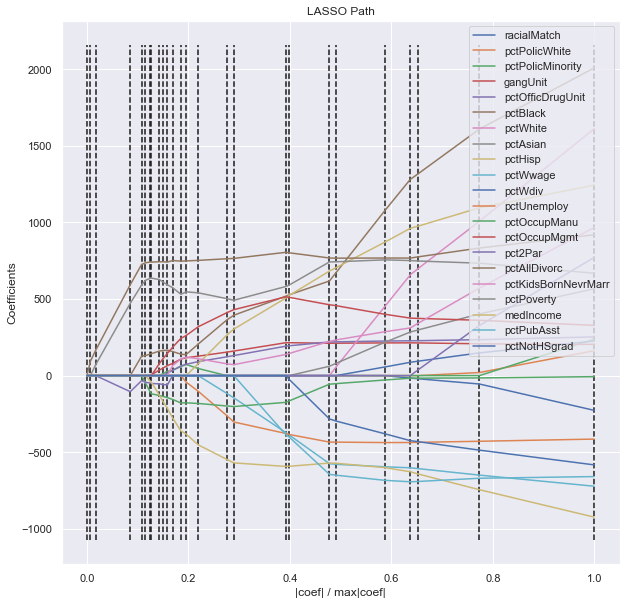

In [72]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

## Ridge alpha optimization

In [217]:
X = crime_police.iloc[:, 1:-1]
y = crime_police.iloc[:,-1]

In [221]:
X_train_val, X_leftout, y_train_val, y_leftout = train_test_split(X, y, test_size=0.2,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [222]:
train_r2_mean = []
test_r2_mean = []

train_rmse = []
test_rmse = []


for alpha in range(-5,7):

    print('\nAlpha:', alpha)
    
    train_r2 = []
    test_r2 = []
    
    for train_ind, test_ind in kf.split(X_train_val,y_train_val):

        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_test, y_test = X.iloc[test_ind], y.iloc[test_ind] 
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        ridge = Ridge(10**alpha)
        ridge.fit(X_train_scaled, y_train)

        train_r2.append(ridge.score(X_train_scaled, y_train))
        test_r2.append(ridge.score(X_test_scaled, y_test))
    
    train_r2_mean.append(np.mean(train_r2))
    test_r2_mean.append(np.mean(test_r2))

    print('Train R2:', np.mean(train_r2_mean).round(3))
    print('Test R2:', np.mean(test_r2_mean).round(3))
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train,ridge.predict(X_train_scaled))))
    test_rmse.append(np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_scaled))))
    
    print('Train RMSE:', np.mean(train_rmse).round(3))
    print('Test RMSE:', np.mean(test_rmse).round(3))


Alpha: -5
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.23
Test RMSE: 0.21

Alpha: -4
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.23
Test RMSE: 0.21

Alpha: -3
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.23
Test RMSE: 0.21

Alpha: -2
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.23
Test RMSE: 0.21

Alpha: -1
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.23
Test RMSE: 0.21

Alpha: 0
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.231
Test RMSE: 0.21

Alpha: 1
Train R2: 0.614
Test R2: 0.547
Train RMSE: 0.231
Test RMSE: 0.21

Alpha: 2
Train R2: 0.608
Test R2: 0.544
Train RMSE: 0.233
Test RMSE: 0.211

Alpha: 3
Train R2: 0.581
Test R2: 0.521
Train RMSE: 0.239
Test RMSE: 0.218

Alpha: 4
Train R2: 0.534
Test R2: 0.477
Train RMSE: 0.25
Test RMSE: 0.227

Alpha: 5
Train R2: 0.486
Test R2: 0.433
Train RMSE: 0.261
Test RMSE: 0.236

Alpha: 6
Train R2: 0.446
Test R2: 0.396
Train RMSE: 0.27
Test RMSE: 0.244


## Lasso alpha optimization

In [223]:
train_r2_mean_l = []
test_r2_mean_l = []

train_rmse_l = []
test_rmse_l = []


for alpha in range(-10,-1):

    print('\nAlpha:', alpha)
    
    train_r2_l = []
    test_r2_l = []
    
    for train_ind, test_ind in kf.split(X_train_val,y_train_val):

        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_test, y_test = X.iloc[test_ind], y.iloc[test_ind] 
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        lasso = Lasso(10**alpha)
        lasso.fit(X_train_scaled, y_train)

        train_r2_l.append(lasso.score(X_train_scaled, y_train))
        test_r2_l.append(lasso.score(X_test_scaled, y_test))
    
    train_r2_mean_l.append(np.mean(train_r2_l))
    test_r2_mean_l.append(np.mean(test_r2_l))

    print('Train R2:', np.mean(train_r2_mean_l).round(3))
    print('Test R2:', np.mean(test_r2_mean_l).round(3))
    
    train_rmse_l.append(np.sqrt(mean_squared_error(y_train,lasso.predict(X_train_scaled))))
    test_rmse_l.append(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test_scaled))))
    
    print('Train RMSE:', np.mean(train_rmse_l).round(3))
    print('Test RMSE:', np.mean(test_rmse_l).round(3))
    
    print(list(zip(X_train.columns,lasso.coef_)))


Alpha: -10
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.23
Test RMSE: 0.21
[('racialMatch', 0.031767878398112966), ('pctPolicMinority', -0.05084705270895736), ('pctOfficDrugUnit', 0.017051360367512498), ('pctBlack', 0.060988347626694236), ('pctAsian', -0.0005398652790306034), ('pctHisp', 0.08062368017770669), ('pctWwage', -0.03219862557405059), ('pctWdiv', -0.008502766131369886), ('pctUnemploy', -0.06634269745351148), ('pctOccupManu', -0.033817981113319476), ('pctOccupMgmt', 0.07395636830692265), ('pct2Par', 0.03805143279428548), ('pctAllDivorc', 0.16912656663287604), ('pctKidsBornNevrMarr', 0.10255584899699641), ('pctPoverty', 0.1364803696555643), ('medIncome', -0.06867784762705406), ('pctPubAsst', -0.07353676253718991), ('pctNotHSgrad', 0.02389290082607001)]

Alpha: -9
Train R2: 0.615
Test R2: 0.546
Train RMSE: 0.23
Test RMSE: 0.21
[('racialMatch', 0.03176786837302166), ('pctPolicMinority', -0.05084703696190974), ('pctOfficDrugUnit', 0.017051359227524685), ('pctBlack', 0.06098832954

Lasso with alpha = -2 zeros out racialMatch, pctPolicMinority, pctAsian, pctWdiv, pct Wwage, pct2Par, pctNotHSGrad

* Alpha: -2
* Train R2: 0.613
* Test R2: 0.546
* Train RMSE: 0.231
* Test RMSE: 0.21



# Remove Colinear features identified by Lasso

In [310]:
crime_sub = crime_police[['nonViolPerPop', 'log_nonviolent',
                     
                        'pctOfficDrugUnit', 
                        
                        'pctBlack', 'pctHisp',
                        
                        'pctUnemploy', 'pctOccupManu', 'pctOccupMgmt',
                        
                        'pctAllDivorc', 'pctKidsBornNevrMarr',
                         
                        'pctPoverty', 'medIncome', 'pctPubAsst', 
                        
                        ]]

In [311]:
crime_sub.head()

,nonViolPerPop,log_nonviolent,pctOfficDrugUnit,pctBlack,pctHisp,pctUnemploy,pctOccupManu,pctOccupMgmt,pctAllDivorc,pctKidsBornNevrMarr,pctPoverty,medIncome,pctPubAsst
0,8903.93,9.094248,6.57,23.14,16.35,8.39,16.43,24.30,12.97,4.71,28.68,17852,9.06
1,7371.00,8.905309,10.81,53.52,0.43,11.05,18.07,22.71,12.74,8.51,27.71,19143,13.58
2,4246.34,8.353813,5.88,1.30,20.96,6.95,9.07,33.09,11.12,2.62,14.37,34372,11.27
3,6171.23,8.727653,7.87,8.41,8.91,4.99,10.60,30.91,12.77,1.89,8.21,35048,2.71
4,6164.95,8.726635,6.91,28.71,24.36,8.98,11.64,30.55,11.77,10.50,19.29,29823,13.12


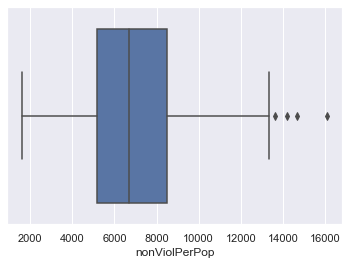

In [368]:
sns.boxplot(crime_sub['nonViolPerPop'])

In [312]:
X_sub = crime_sub.iloc[:, 2:]
y_sub = crime_sub.iloc[:, 1]

In [315]:
X_train_val, X_leftout, y_train_val, y_leftout = train_test_split(X_sub, y_sub, test_size=0.2,random_state=42)

In [316]:
X_train_val.shape, y_train_val.shape

((258, 11), (258,))

In [317]:
X_leftout.shape, y_leftout.shape

((65, 11), (65,))

In [318]:
kf = KFold(n_splits=5,shuffle=True, random_state=40)

In [319]:
lr_r2 = []
lasso_r2 = []
ridge_r2 = []

lr_rmse = []
lasso_rmse = []
ridge_rmse = []

for tr,te in kf.split(X_train_val, y_train_val):
    
    lr = LinearRegression()
    lasso_sub = Lasso(alpha = 10**-2)
    ridge_sub = Ridge(alpha = 10**-2)
    
    X_tr,X_te = X_train_val.iloc[tr] ,X_train_val.iloc[te]
    y_tr,y_te = y_train_val.iloc[tr] ,y_train_val.iloc[te]
    
    scale = StandardScaler()
    scale.fit(X_tr)
   

    X_tr = scale.transform(X_tr)
    
    X_te = scale.transform(X_te)
    
    lr.fit(X_tr,y_tr)
    lasso_sub.fit(X_tr,y_tr)
    ridge_sub.fit(X_tr,y_tr)
    
    lr_r2.append(r2_score(y_te,lr.predict(X_te)))
    lasso_r2.append(r2_score(y_te,lasso_sub.predict(X_te)))
    ridge_r2.append(r2_score(y_te,ridge_sub.predict(X_te)))
    
    lr_rmse.append(np.sqrt(mean_squared_error(y_te,lr.predict(X_te))))
    lasso_rmse.append(np.sqrt(mean_squared_error(y_te,lasso_sub.predict(X_te))))
    ridge_rmse.append(np.sqrt(mean_squared_error(y_te,ridge_sub.predict(X_te))))

In [320]:
lr_r2

[0.6078718736900333,
 0.5685840140474507,
 0.5388659258519888,
 0.5949373842416752,
 0.5854144333744169]

In [321]:
lasso_r2

[0.5716203637864194,
 0.5443175729494336,
 0.5597605538521246,
 0.5694914914802468,
 0.5981301314733518]

In [322]:
ridge_r2

[0.6070776562642188,
 0.5698020219334307,
 0.5412962371870005,
 0.59522591087179,
 0.5880448659100056]

In [323]:
print(list(zip(X_train_val.columns, ridge.coef_)))

[('pctOfficDrugUnit', -0.005568339295370365), ('pctBlack', -0.013954098283293113), ('pctHisp', 0.03132807974100584), ('pctUnemploy', 0.041964638971238866), ('pctOccupManu', 0.02142265505151721), ('pctOccupMgmt', 0.1287097216219339), ('pctAllDivorc', -0.09126727989155074), ('pctKidsBornNevrMarr', -3.861489889080796e-06), ('pctPoverty', -0.05985862252006016), ('medIncome', -0.010730678572256415), ('pctPubAsst', 0.002233623849464852)]


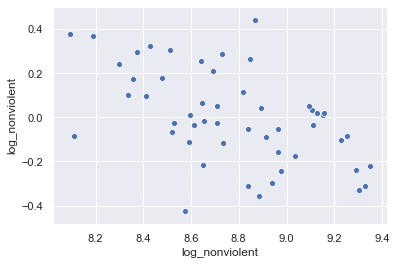

In [328]:
## Residual Plot
sns.scatterplot(x= y_te, y= (ridge_sub.predict(X_te)-y_te))

## Final Model: Ridge with alpha = .01

In [351]:
##final model

ridge_model = Ridge(alpha = 10**-2)

scale = StandardScaler()
scale.fit(X_train_val)

X_train_val = scale.transform(X_train_val)
    
X_leftout = scale.transform(X_leftout)

ridge_model.fit(X_train_val, y_train_val)

y_hat = ridge_model.predict(X_leftout)

In [362]:
coefficients = list(zip(X_sub.columns ,ridge_model.coef_))

In [364]:
coefficients

[('pctOfficDrugUnit', 0.0245988020340415),
 ('pctBlack', 0.03602626190973539),
 ('pctHisp', 0.07408491329023453),
 ('pctUnemploy', -0.0723189824246216),
 ('pctOccupManu', -0.04691359787328183),
 ('pctOccupMgmt', 0.05228974766140111),
 ('pctAllDivorc', 0.15387950315930585),
 ('pctKidsBornNevrMarr', 0.06010531314720662),
 ('pctPoverty', 0.15112203961972173),
 ('medIncome', -0.08001003412524295),
 ('pctPubAsst', -0.05988334404659729)]

In [348]:
r2_score(y_leftout,ridge_model.predict(X_leftout))

0.3857604286810373

In [349]:
mean_squared_error(y_leftout,ridge_model.predict(X_leftout))

0.06327361749425991

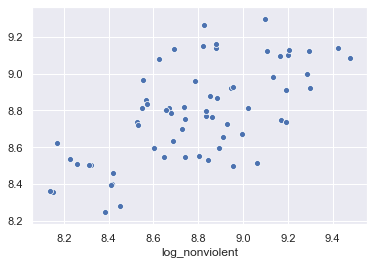

In [353]:
sns.scatterplot(x= y_leftout , y=  y_hat)

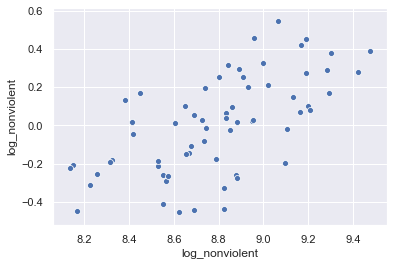

In [354]:
sns.scatterplot(x= y_leftout, y = y_leftout - y_hat)

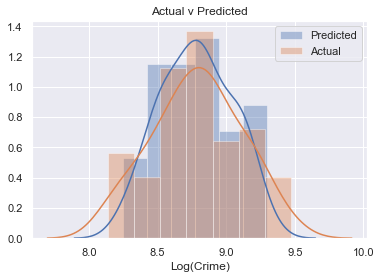

In [385]:
#predicted v actual

sns.distplot(y_hat, axlabel = 'Log(Crime)', label = 'Predicted')
sns.distplot(y_leftout, axlabel = 'Log(Crime)', label = 'Actual').set_title('Actual v Predicted')
plt.legend()
plt.show()